In [4]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [2]:
import imp

In [7]:
import xy

## 300

<Axes: >

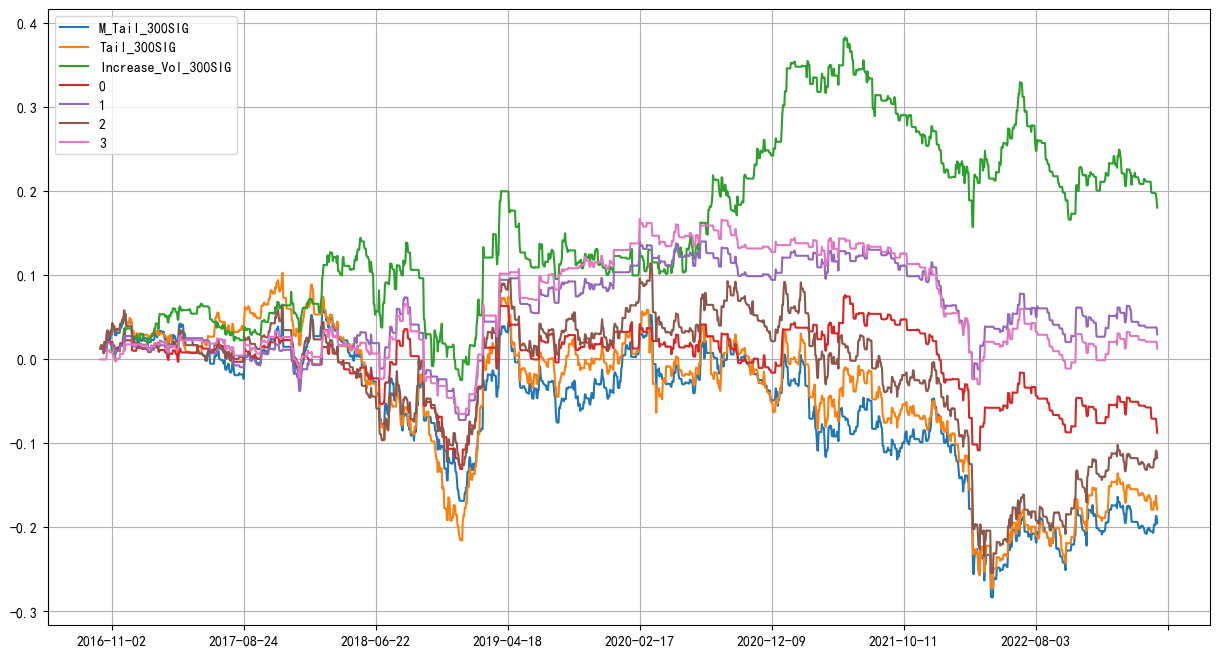

In [511]:
IN300 = xy.IndexMin300jq.loc['2016-01-05 9:31':'2023-05-23 15:00','close'].copy()
FT300 = xy.Future_Min300jq.loc['2016-01-05 09:31':'2023-05-23 15:01','close'].copy()
FT300_vol = xy.ETFMin300jq.loc['2016-01-05 09:31':'2023-05-23 15:01','volume'].copy()
IN300.index = FT300.index
FT300_vol.index = FT300.index

MinRaw = pd.concat([
    FT300.rename('ft'),
    IN300.rename('idx'),
    FT300_vol.rename('vol')
],axis=1)

MinRaw.index = FT300.index.map(lambda x:x[:10])

M_Tail_SIGS = {}
Tail_SIGS = {}
Increase_Vol = {}
Vret = {}
COR = {}

m = 40
fee = 0.0005
end_date = '2023-05-10'

for d0, row in MinRaw.groupby(level=0):
    Motion = ((row.ft - row.idx)/row.idx - ((row.ft - row.idx)/row.idx).mean())
    M_Tail_Premium = Motion.iloc[-m:].mean() - Motion.iloc[:m].mean()
    M_Tail_SIGS[d0] = M_Tail_Premium
    
    Tail_Premium = Motion.iloc[-m:].mean() - Motion.mean()
    Tail_SIGS[d0] = Tail_Premium
    
    Increase_Vol[d0] = row.vol[Motion.diff()>0].sum() - row.vol[Motion.diff()<0].sum()
    Vret[d0] = (Motion[-m:] * (row.vol[-m:]/row.vol.sum())).sum()
    COR[d0] = row.vol.corr(Motion)
    
    # Motion.plot()
    # plt.show()

M_Tail_300SIG = pd.Series(M_Tail_SIGS).shift(1).map(lambda x:1 if x>0 else -0)
Tail_300SIG = pd.Series(Tail_SIGS).shift(1).map(lambda x:1 if x>0 else -0)
Increase_Vol_300SIG = pd.Series(Increase_Vol).shift(1).map(lambda x:1 if x>0 else -0)
Vret_300SIG = pd.Series(Vret).shift(1).map(lambda x:1 if x>0 else -0)
COR_300SIG = pd.Series(COR).shift(1).map(lambda x:1 if x>0 else -0)

COM_300SIG = (Tail_300SIG + Increase_Vol_300SIG).map(lambda x:1 if x==2 else (-1 if x==-2 else 0)).ffill()
COM_300SIG1 = (M_Tail_300SIG + Increase_Vol_300SIG).map(lambda x:1 if x==2 else (-1 if x==-2 else 0)).ffill()
COM_300SIG2 = (M_Tail_300SIG + Tail_300SIG).map(lambda x:1 if x==2 else (-1 if x==-2 else 0)).ffill()
COM_300SIG3 = ( Vret_300SIG + Increase_Vol_300SIG + M_Tail_300SIG).map(lambda x:1 if x==3 else (-1 if x==-3 else 0)).ffill()

((M_Tail_300SIG * xy.Index_rets.loc['300','2016-10-10':end_date])-M_Tail_300SIG.diff().abs()*fee).rename('M_Tail_300SIG').cumsum().plot(legend=True)
((Tail_300SIG * xy.Index_rets.loc['300','2016-10-10':end_date])-Tail_300SIG.diff().abs()*fee).rename('Tail_300SIG').cumsum().plot(legend=True)
((Increase_Vol_300SIG * xy.Index_rets.loc['300','2016-10-10':end_date])-Increase_Vol_300SIG.diff().abs()*fee).rename('Increase_Vol_300SIG').cumsum().plot(legend=True)


((COM_300SIG* xy.Index_rets.loc['300','2016-10-10':end_date])-COM_300SIG.diff().abs()*fee).rename('0').cumsum().plot(legend=True,figsize=(15,8),grid=True)
((COM_300SIG1* xy.Index_rets.loc['300','2016-10-10':end_date])-COM_300SIG1.diff().abs()*fee).rename('1').cumsum().plot(legend=True,figsize=(15,8),grid=True)
((COM_300SIG2* xy.Index_rets.loc['300','2016-10-10':end_date])-COM_300SIG2.diff().abs()*fee).rename('2').cumsum().plot(legend=True,figsize=(15,8),grid=True)
((COM_300SIG3* xy.Index_rets.loc['300','2016-10-10':end_date])-COM_300SIG3.diff().abs()*fee).rename('3').cumsum().plot(legend=True,figsize=(15,8),grid=True)

## 50

<Axes: >

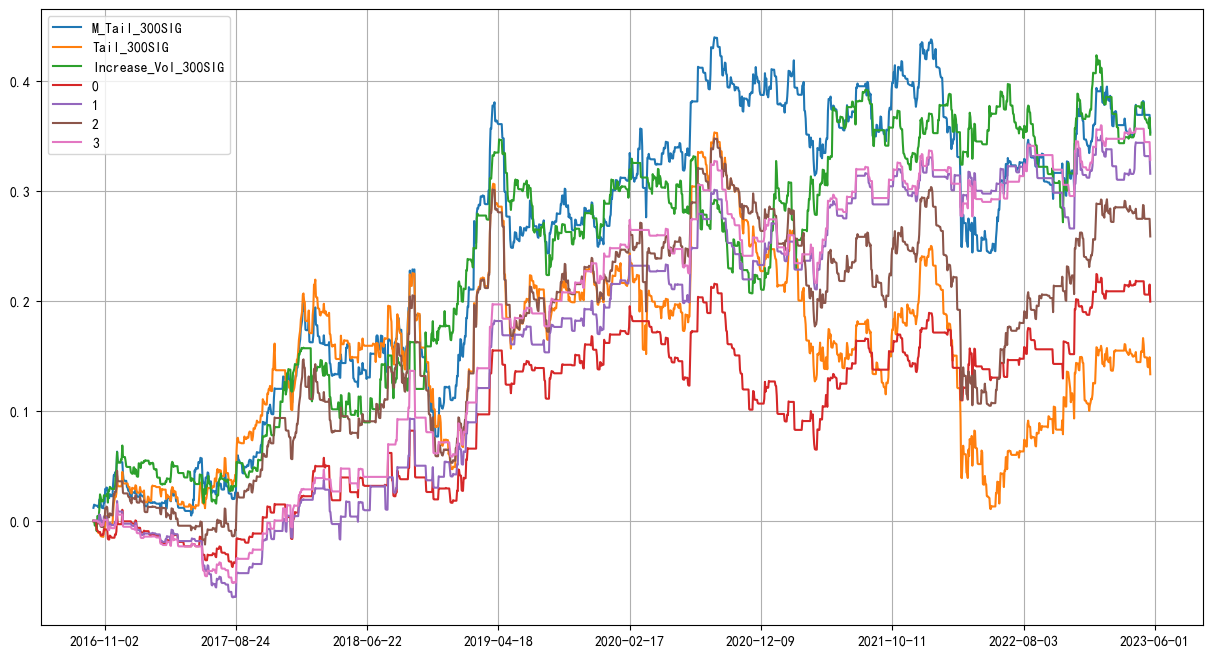

In [520]:
IN300 = xy.IndexMin50jq.loc['2016-01-05 9:31':'2023-05-23 15:00','close'].copy()
FT300 = xy.Future_Min50jq.loc['2016-01-05 09:31':'2023-05-23 15:01','close'].copy()
FT300_vol = xy.ETFMin50jq.loc['2016-01-05 09:31':'2023-05-23 15:01','volume'].copy()
IN300.index = FT300.index
FT300_vol.index = FT300.index

MinRaw = pd.concat([
    FT300.rename('ft'),
    IN300.rename('idx'),
    FT300_vol.rename('vol')
],axis=1)

MinRaw.index = FT300.index.map(lambda x:x[:10])

M_Tail_SIGS = {}
Tail_SIGS = {}
Increase_Vol = {}
Vret = {}
COR = {}

m = 40
fee = 0.0005
end_date = '2023-10-10'

for d0, row in MinRaw.groupby(level=0):
    Motion = ((row.ft - row.idx)/row.idx - ((row.ft - row.idx)/row.idx).mean())
    M_Tail_Premium = Motion.iloc[-m:].mean() - Motion.iloc[:m].mean()
    M_Tail_SIGS[d0] = M_Tail_Premium
    
    Tail_Premium = Motion.iloc[-m:].mean() - Motion.mean()
    Tail_SIGS[d0] = Tail_Premium
    
    Increase_Vol[d0] = row.vol[Motion.diff()>0].sum() - row.vol[Motion.diff()<0].sum()
    Vret[d0] = (Motion[-m:] * (row.vol[-m:]/row.vol.sum())).sum()
    COR[d0] = row.vol.corr(Motion)
    
    # Motion.plot()
    # plt.show()

M_Tail_300SIG = pd.Series(M_Tail_SIGS).shift(1).map(lambda x:1 if x>0 else -0)
Tail_300SIG = pd.Series(Tail_SIGS).shift(1).map(lambda x:1 if x>0 else -0)
Increase_Vol_300SIG = pd.Series(Increase_Vol).shift(1).map(lambda x:1 if x>0 else -0)
Vret_300SIG = pd.Series(Vret).shift(1).map(lambda x:1 if x>0 else -0)
COR_300SIG = pd.Series(COR).shift(1).map(lambda x:1 if x>0 else -0)

COM_300SIG = (Tail_300SIG + Increase_Vol_300SIG).map(lambda x:1 if x==2 else (-1 if x==-2 else 0)).ffill()
COM_300SIG1 = (M_Tail_300SIG + Increase_Vol_300SIG).map(lambda x:1 if x==2 else (-1 if x==-2 else 0)).ffill()
COM_300SIG2 = (M_Tail_300SIG + Tail_300SIG).map(lambda x:1 if x==2 else (-1 if x==-2 else 0)).ffill()
COM_300SIG3 = ( Vret_300SIG + Increase_Vol_300SIG + M_Tail_300SIG).map(lambda x:1 if x==3 else (-1 if x==-3 else 0)).ffill()

((M_Tail_300SIG * xy.Index_rets.loc['50','2016-10-10':end_date])-M_Tail_300SIG.diff().abs()*fee).rename('M_Tail_300SIG').cumsum().plot(legend=True)
((Tail_300SIG * xy.Index_rets.loc['50','2016-10-10':end_date])-Tail_300SIG.diff().abs()*fee).rename('Tail_300SIG').cumsum().plot(legend=True)
((Increase_Vol_300SIG * xy.Index_rets.loc['50','2016-10-10':end_date])-Increase_Vol_300SIG.diff().abs()*fee).rename('Increase_Vol_300SIG').cumsum().plot(legend=True)

((COM_300SIG* xy.Index_rets.loc['50','2016-10-10':end_date])-COM_300SIG.diff().abs()*fee).rename('0').cumsum().plot(legend=True,figsize=(15,8),grid=True)
((COM_300SIG1* xy.Index_rets.loc['50','2016-10-10':end_date])-COM_300SIG1.diff().abs()*fee).rename('1').cumsum().plot(legend=True,figsize=(15,8),grid=True)
((COM_300SIG2* xy.Index_rets.loc['50','2016-10-10':end_date])-COM_300SIG2.diff().abs()*fee).rename('2').cumsum().plot(legend=True,figsize=(15,8),grid=True)
((COM_300SIG3* xy.Index_rets.loc['50','2016-10-10':end_date])-COM_300SIG3.diff().abs()*fee).rename('3').cumsum().plot(legend=True,figsize=(15,8),grid=True)

<Axes: >

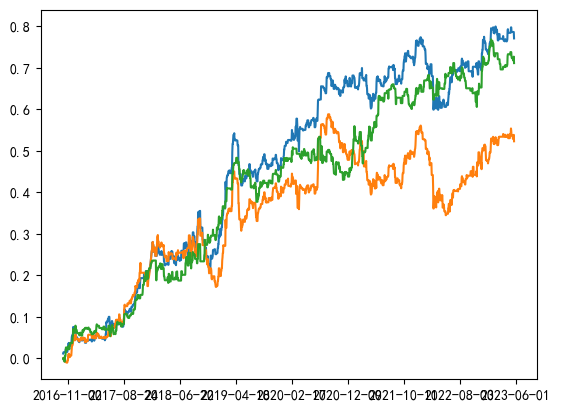

In [351]:
((M_Tail_300SIG * xy.Index_rets.loc['50','2016-10-10':])).cumsum().plot()
((Tail_300SIG * xy.Index_rets.loc['50','2016-10-10':])).cumsum().plot()
((Increase_Vol_300SIG * xy.Index_rets.loc['50','2016-10-10':])).cumsum().plot()

<Axes: >

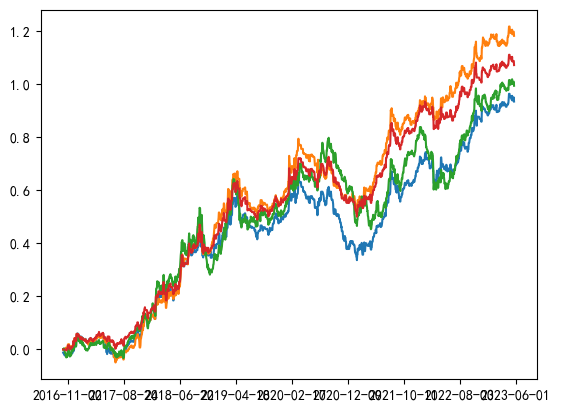

In [347]:
# ((M_Tail_300SIG * xy.Index_rets.loc['50','2016-10-10':])).cumsum().plot()#'2019-10-15'
# ((Tail_300SIG * xy.Index_rets.loc['50','2016-10-10':])).cumsum().plot()#'2019-10-15'
# ((Increase_Vol_300SIG * xy.Index_rets.loc['50','2016-10-10':])).cumsum().plot()
((COM_300SIG * xy.Index_rets.loc['50','2016-10-10':])).cumsum().plot()
(COM_300SIG1 * xy.Index_rets.loc['50','2016-10-10':]).cumsum().plot()
(COM_300SIG2 * xy.Index_rets.loc['50','2016-10-10':]).cumsum().plot()
(COM_300SIG3 * xy.Index_rets.loc['50','2016-10-10':]).cumsum().plot()

<Axes: >

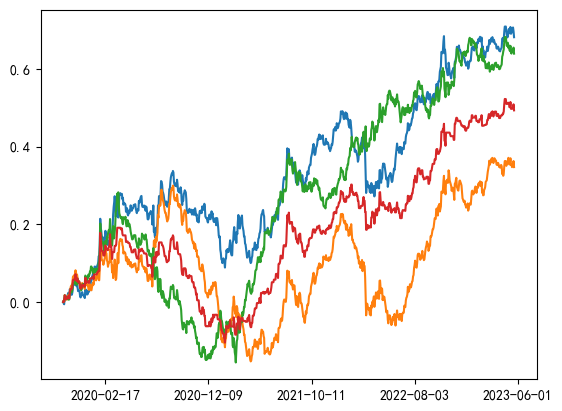

In [348]:
((M_Tail_300SIG * xy.Index_rets.loc['50','2019-10-15':])).cumsum().plot()#'2019-10-15'
((Tail_300SIG * xy.Index_rets.loc['50','2019-10-15':])).cumsum().plot()#'2019-10-15'
((Increase_Vol_300SIG * xy.Index_rets.loc['50','2019-10-15':])).cumsum().plot()
((COM_300SIG * xy.Index_rets.loc['50','2019-10-15':])).cumsum().plot()

2016-01-05 09:31:00    3381.70
2016-01-05 09:32:00    3400.66
2016-01-05 09:33:00    3421.87
2016-01-05 09:34:00    3442.82
2016-01-05 09:35:00    3462.30
                        ...   
2023-05-23 14:56:00    3915.50
2023-05-23 14:57:00    3915.73
2023-05-23 14:58:00    3916.26
2023-05-23 14:59:00    3916.26
2023-05-23 15:00:00    3913.19
Name: close, Length: 430560, dtype: float64

# $因子描述：LBSC （LongBackShortContango）$

In [268]:
data = pd.read_excel(r'\\share\FREE\lsh\his_data\日频数据.xlsx',sheet_name='期货',header=[0,1,2],index_col=0)

In [269]:
data.index = data.index.map(lambda x: str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[-2:])

In [271]:
div = pd.read_csv(r'E:\PyProject\index_div.csv',index_col=0)

In [272]:
div.index = div.index.map(lambda x:str(x))

In [273]:
 div

2015-01-05  2015-01-06  2015-01-07  2015-01-08  2015-01-09  2015-01-12  \
50             0    0.000000           0           0    1.335221           0   
300            0    0.000000           0           0    0.854880           0   
500            0    0.042157           0           0    0.000000           0   
1000           0    0.000000           0           0    0.000000           0   

      2015-01-13  2015-01-14  2015-01-15  2015-01-16  ...  2023-04-27  \
50             0           0           0           0  ...    0.000000   
300            0           0           0           0  ...    0.222085   
500            0           0           0           0  ...    0.288491   
1000           0           0           0           0  ...    0.462756   

      2023-04-28  2023-05-04  2023-05-05  2023-05-08  2023-05-09  2023-05-10  \
50      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
300     0.066238    0.000000    0.000000    0.000000    0.049032    0.032099   
500     0.685055    0.000000    2.367135    1.160138    0.718342    0.877296   
1000    0.507622    0.301472    0.369959    0.135545    0.242628    1.104849   

      2023-05-11  2023-05-12  2023-05-15  
50      0.000000    0.000000    0.000000  
300     0.003304    0.321140    0.141358  
500     0.794824    0.809134    0.753575  
1000    0.160259    0.775834    0.345607  

[4 rows x 2033 columns]

In [275]:
IH

date       IH00C1.CFE IH00C2.CFE IH00C3.CFE IH00C4.CFE  C2-C1/C1  C3-C2/C1  \
               IH当月连续     IH下月连续     IH下季连续     IH隔季连续                       
                  收盘价        收盘价        收盘价        收盘价                       
2010-04-16        0.0        0.0        0.0        0.0       NaN       NaN   
2010-04-19        0.0        0.0        0.0        0.0       NaN       NaN   
2010-04-20        0.0        0.0        0.0        0.0       NaN       NaN   
2010-04-21        0.0        0.0        0.0        0.0       NaN       NaN   
2010-04-22        0.0        0.0        0.0        0.0       NaN       NaN   
...               ...        ...        ...        ...       ...       ...   
2023-08-03     2652.0     2656.6     2670.2     2687.0  0.001735  0.005128   
2023-08-04     2652.6     2656.2     2668.8     2684.6  0.001357  0.004750   
2023-08-07     2644.6     2650.4     2665.8     2684.6  0.002193  0.005823   
2023-08-08     2639.4     2645.4     2660.8     2681.4  0.002273  0.005835   
2023-08-09     2640.0     2646.0     2661.0     2681.0  0.002273  0.005682   

date        C4-C3/C1  contango  
                                
                                
2010-04-16       NaN       NaN  
2010-04-19       NaN       NaN  
2010-04-20       NaN       NaN  
2010-04-21       NaN       NaN  
2010-04-22       NaN       NaN  
...              ...       ...  
2023-08-03  0.006335  1.013250  
2023-08-04  0.005956  1.012106  
2023-08-07  0.007109  1.015195  
2023-08-08  0.007805  1.015989  
2023-08-09  0.007576  1.015604  

[3236 rows x 8 columns]

<Axes: >

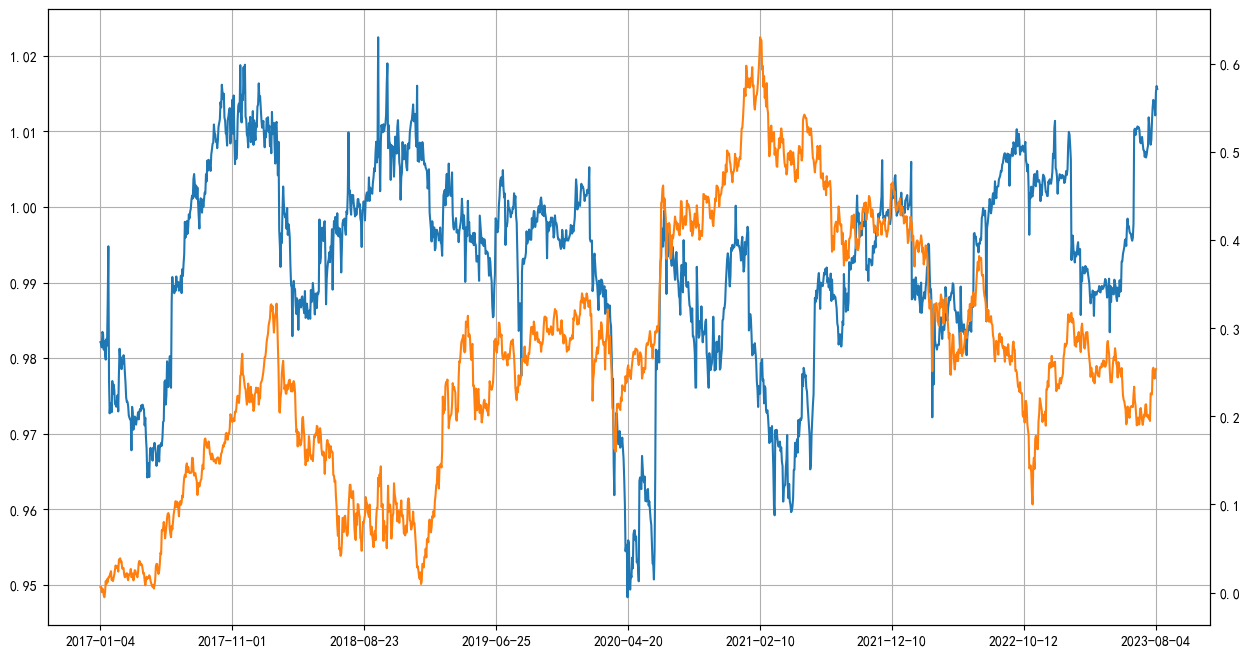

In [14]:
IH = data[[('IH00C1.CFE', 'IH当月连续', '收盘价'),('IH00C2.CFE', 'IH下月连续', '收盘价'),('IH00C3.CFE', 'IH下季连续', '收盘价'),('IH00C4.CFE', 'IH隔季连续', '收盘价')]]
IFHhold = data[[('IH00C1.CFE', 'IH当月连续', '持仓量'),('IH00C2.CFE', 'IH下月连续', '持仓量'),('IH00C3.CFE', 'IH下季连续', '持仓量'),('IH00C4.CFE', 'IH隔季连续', '持仓量')]]

IH['C2-C1/C1'] = (IH[('IH00C2.CFE', 'IH下月连续', '收盘价')].rolling(1).mean() - IH[('IH00C1.CFE', 'IH当月连续', '收盘价')])/IH[('IH00C1.CFE', 'IH当月连续', '收盘价')].rolling(1).mean()
IH['C3-C2/C1'] = (IH[('IH00C3.CFE', 'IH下季连续', '收盘价')].rolling(1).mean() - IH[('IH00C2.CFE', 'IH下月连续', '收盘价')])/IH[('IH00C1.CFE', 'IH当月连续', '收盘价')].rolling(1).mean()
IH['C4-C3/C1'] = (IH[('IH00C4.CFE', 'IH隔季连续', '收盘价')].rolling(1).mean() - IH[('IH00C3.CFE', 'IH下季连续', '收盘价')])/IH[('IH00C1.CFE', 'IH当月连续', '收盘价')].rolling(1).mean()
# IF['C2-C1/C1'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')] - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')])/IF[('IF00C1.CFE', 'IF当月连续', '收盘价')]

IH['contango'] = ((1+IH['C2-C1/C1']) * (1+IH['C3-C2/C1']) * (1+IH['C4-C3/C1']))
# IF['C2-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C3-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C4-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
IH['contango'].loc['2017-01-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)

# (IF['C4-C1/C1'].loc['2015-05-04':].rolling(10).mean() - IF['C2-C1/C1'].loc['2015-05-04':].rolling(10).mean()).plot(figsize=(15,8),grid=True)
# (IF['C4-C1/C1'].loc['2015-05-04':].rolling(10).mean() - IF['C3-C1/C1'].loc['2015-05-04':].rolling(10).mean()).plot(figsize=(15,8),grid=True)


xy.Index_rets.loc['50','2017-01-04':].cumsum().plot(figsize=(15,8),secondary_y=True)
# IF_hold.apply(lambda x:x/IF_hold.sum(axis=1)).loc['2015-05-04':,('IF00C4.CFE', 'IF隔季连续', '持仓量')].plot(figsize=(15,8),secondary_y=True)

In [3084]:
IF = data[[('IF00C1.CFE', 'IF当月连续', '收盘价'),('IF00C2.CFE', 'IF下月连续', '收盘价'),('IF00C3.CFE', 'IF下季连续', '收盘价'),('IF00C4.CFE', 'IF隔季连续', '收盘价')]]
IF_hold = data[[('IF00C1.CFE', 'IF当月连续', '持仓量'),('IF00C2.CFE', 'IF下月连续', '持仓量'),('IF00C3.CFE', 'IF下季连续', '持仓量'),('IF00C4.CFE', 'IF隔季连续', '持仓量')]]

In [3085]:
IF['close'] = xy.cl.T['300']

In [3086]:
div_data_IF = pd.read_excel(r'..\..\代码表300.xlsx')

In [3087]:
div_data_IF.index = div_data_IF.date.apply(lambda x: str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:])

In [3088]:
next_season_recover = {}
far_next_season_recover = {}

next_month_days_left = {}
next_season_days_left = {}
far_next_season_days_left = {}

for d, row in div_data_IF.iterrows():
    next_month_crt = row.xydm
    next_season_crt = row.jydm
    far_next_season_crt = row.yydm
    
    _next_month_day_left = div_data_IF[(div_data_IF.dydm==next_month_crt)].groupby('dueday')['days'].max().sum() + row['days']
    next_month_days_left[d] = _next_month_day_left
    
    if next_season_crt == 'IF2309':
        continue
    else:
        # 下季回补的起始点
        div_next_season_sum = div_data_IF[(div_data_IF.dydm==next_season_crt)|(div_data_IF.xydm==next_season_crt)&(div_data_IF.jydm!=next_season_crt)]['分红回落点位'].sum()
        _win = div_data_IF[div_data_IF.jydm==next_season_crt]
        _day_left = div_data_IF[(div_data_IF.dydm==next_season_crt)|(div_data_IF.xydm==next_season_crt)].groupby('dueday')['days'].max().sum() + row['days']
        # 下季合约为当前合约的总回补
        next_season_recover[d] = (div_data_IF.loc[d:_win.index[-1],'分红回落点位'].sum() + div_next_season_sum)
        next_season_days_left[d] = _day_left
    
    if far_next_season_crt == 'IF2312':
        continue
    else:
        # 隔季回补的起始点
        div_far_next_season_sum = div_data_IF[(div_data_IF.dydm==far_next_season_crt)|(div_data_IF.xydm==far_next_season_crt)|(div_data_IF.jydm==far_next_season_crt)&(div_data_IF.yydm!=far_next_season_crt)]['分红回落点位'].sum()
        _far_win = div_data_IF[div_data_IF.yydm==far_next_season_crt]
        _far_day_left = div_data_IF[(div_data_IF.dydm==far_next_season_crt)|(div_data_IF.xydm==far_next_season_crt)|(div_data_IF.jydm==far_next_season_crt)].groupby('dueday')['days'].max().sum() + row['days']
        
        # 隔季合约为当前合约的总回补
        far_next_season_recover[d] = div_data_IF.loc[d:_far_win.index[-1],'分红回落点位'].sum() + div_far_next_season_sum
        far_next_season_days_left[d] = _far_day_left
        
    # break

In [3089]:
div_data_IF['下季回补'] = pd.Series(next_season_recover)
div_data_IF['隔季回补'] = pd.Series(far_next_season_recover)

div_data_IF['下月剩余天数'] = pd.Series(next_month_days_left).mask(pd.Series(next_month_days_left)==0,0.5)
div_data_IF['下季剩余天数'] = pd.Series(next_season_days_left).mask(pd.Series(next_season_days_left)==0,0.5)
div_data_IF['隔季剩余天数'] = pd.Series(far_next_season_days_left).mask(pd.Series(far_next_season_days_left)==0,0.5)
div_data_IF['days'] = div_data_IF['days'].mask(div_data_IF['days']==0, 0.5)

<Axes: xlabel='date'>

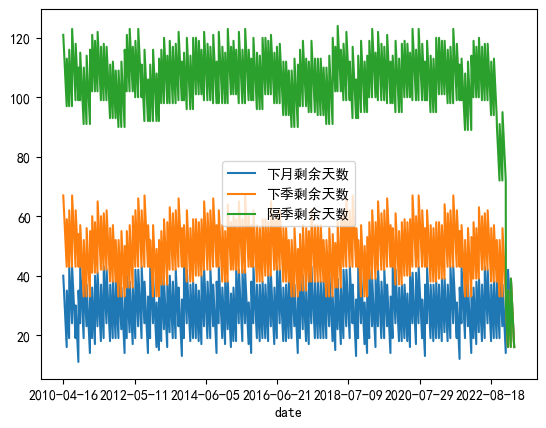

In [3090]:
div_data_IF.dropna().iloc[:,-3:].plot()

In [3091]:
IF[IF.columns[0]] = IF[IF.columns[0]] + div_data_IF['当月回补']
IF[IF.columns[1]] = IF[IF.columns[1]] + div_data_IF['下月回补']
IF[IF.columns[2]] = IF[IF.columns[2]] + div_data_IF['下季回补']
IF[IF.columns[3]] = IF[IF.columns[3]] + div_data_IF['隔季回补']

In [3092]:
IF['days1'] = div_data_IF['days']
IF['days2'] = div_data_IF['下月剩余天数']
IF['days3'] = div_data_IF['下季剩余天数']
IF['days4'] = div_data_IF['隔季剩余天数']

In [3175]:
start_d = '2016-01-04'
end_d = '2023-04-20'
al = .1

In [3094]:
from datetime import datetime, timedelta

def third_friday(year, month):
    day = 1
    while True:
        date = datetime(year, month, day)
        if(date.weekday() == 3):  # 4表示星期五
            break
        day += 1
    third_thursday_date = date + timedelta(days=14)
    third_friday_date = date + timedelta(days=15)  # 增加14天得到第三个周五
    return third_friday_date

# 示例日期字符串列表
date_strings = [i for i in IF.index.map(lambda x:str(x))]

third_fridays = []
for date_str in date_strings:
    year, month, _ = map(int, date_str.split('-'))
    third_friday_date = third_friday(year, month)
    third_fridays.append(third_friday_date.strftime('%Y-%m-%d'))
    # third_fridays.append(third_thursday_date.strftime('%Y-%m-%d'))

In [3095]:
IF = IF.apply(lambda x:x.mask(x.index.isin(set(third_fridays)),np.nan)).ffill()

<Axes: >

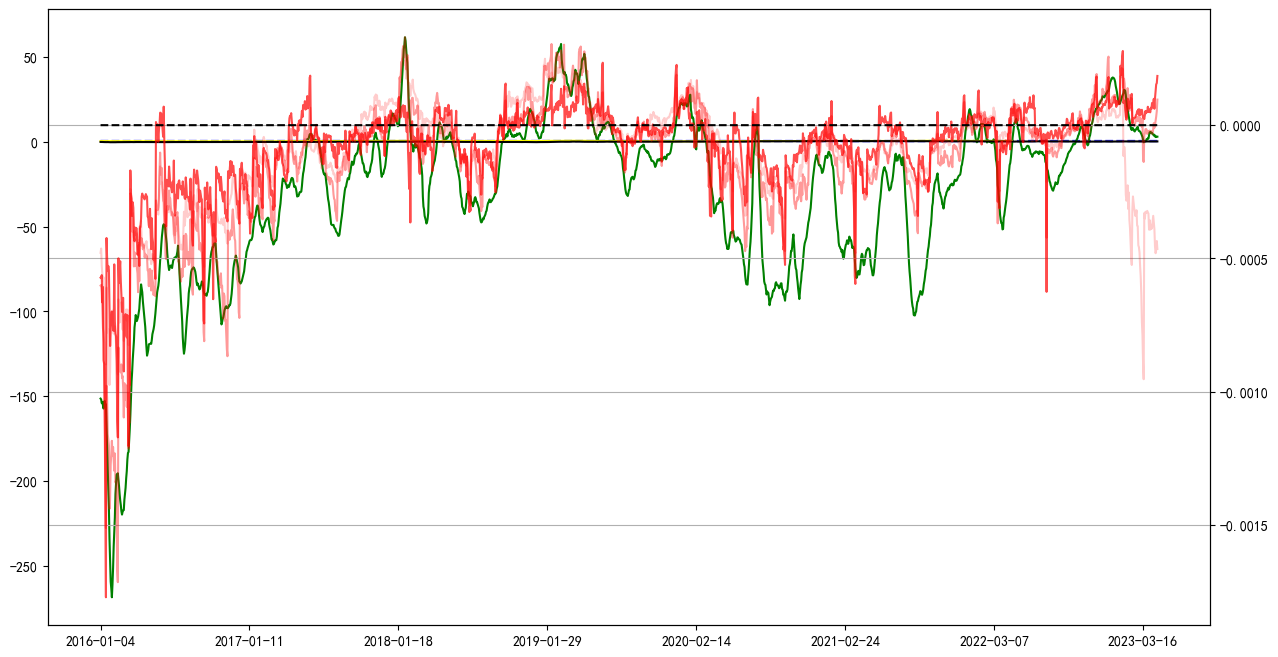

In [3224]:
# IF['C1-C0/C0 %'] = (IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean() - IF['close'].rolling(1).mean())/IF['close'].rolling(1).mean()
IF['C2-C0/C0 %'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')].rolling(1).mean() - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean())/IF['close'].rolling(1).mean()
IF['C3-C0/C0 %'] = (IF[('IF00C3.CFE', 'IF下季连续', '收盘价')].rolling(1).mean() - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean())/IF['close'].rolling(1).mean()
IF['C4-C0/C0 %'] = (IF[('IF00C4.CFE', 'IF隔季连续', '收盘价')].rolling(1).mean() - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean())/IF['close'].rolling(1).mean()
# IF['C2-C1/C1'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')] - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')])/IF[('IF00C1.CFE', 'IF当月连续', '收盘价')]
IF['C'] = (IF[('IF00C3.CFE', 'IF下季连续', '收盘价')].rolling(1).mean() / IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean())
# IF['contago1'] = ( (IF['C1-C0/C0 %']).rolling(1).mean())/div_data_IF['days']  
# IF['contago1'] = (IF['contago1'].map(lambda x:min(x,0.03) if x > 0 else max(x,-0.03)))
IF['contago2'] = ( (IF['C2-C0/C0 %']).rolling(1).mean())/div_data_IF['下月剩余天数']
IF['contago3'] = ( (IF['C3-C0/C0 %']).rolling(1).mean())/div_data_IF['下季剩余天数']
IF['contago4'] = ( (IF['C4-C0/C0 %']).rolling(1).mean())/div_data_IF['隔季剩余天数']

# Cox-Stuart统计量，越大，则越倾向于升水序列 
IF['CS-test'] = (IF[('IF00C3.CFE', 'IF下季连续', '收盘价')]  - 1*IF['close'])#+ (IF[['contago1','contago2']].mean(axis=1))
IF['C1-C3'] = (IF.contago1 - IF.contago3)/1
IF['C2-C3'] = (IF.contago2 - IF.contago3)/1

# convex 值越大，预期越快上涨
IF['min_ctg'] = IF[['contago4','contago3','contago2','contago1']].min(axis=1)
IF['convex'] = IF[['contago2','contago1']].mean(axis=1) - IF['min_ctg']  #IF[['contago4','contago3','contago2','contago1']].sum(axis=1) - 4*IF['min_ctg']

# IF['C2-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C3-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C4-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# (IF['contago1'].loc[start_d:end_d]).rolling(1).mean().plot(figsize=(15,8),color='red',secondary_y=True)
(IF['contago2'].loc[start_d:end_d]).rolling(1).mean().plot(figsize=(15,8),color='red',alpha=0.7,secondary_y=True)
(IF['contago3'].loc[start_d:end_d]).rolling(1).mean().plot(figsize=(15,8),color='red',alpha=0.4,secondary_y=True)
(IF['contago4'].loc[start_d:end_d]).rolling(1).mean().plot(figsize=(15,8),color='red',alpha=0.2,secondary_y=True)
pd.Series(0.3,index=(IF['contago3'].loc[start_d:end_d].rolling(10).mean()-1).index).plot(figsize=(15,8),color='blue',alpha=0.6,style='--')
pd.Series(0.6,index=(IF['contago3'].loc[start_d:end_d].rolling(10).mean()-1).index).plot(figsize=(15,8),color='blue',alpha=0.6,style='--')
pd.Series(0,index=(IF['contago3'].loc[start_d:end_d].rolling(10).mean()-1).index).plot(figsize=(15,8),color='black',alpha=1,secondary_y=True,style='--')
IF['CS-test'].rolling(10).mean().loc[start_d:end_d].plot(figsize=(15,8),color='green')
# (IF['convex2']).rolling(1).mean().loc[start_d:end_d].plot(figsize=(15,8),color='blue')

(index_YSBgap/10).loc[start_d:end_d,'300'].plot(figsize=(15,8),color='yellow')
# plt.show()
(xy.Index_rets.loc['300',start_d:end_d].cumsum()/1).plot(figsize=(15,8),color='black',grid=True)
# pd.Series(0,index=(IF['contago3'].loc[start_d:end_d].rolling(10).mean()-1).index).plot(figsize=(15,8),color='black',alpha=1,style='--')
# IF_hold.apply(lambda x:x/IF_hold.sum(axis=1)).loc['2015-05-04':,('IF00C4.CFE', 'IF隔季连续', '持仓量')].plot(figsize=(15,8),secondary_y=True)

In [3181]:
index_YSBgap

50       300       500      1000
2017-01-03  6.559424  4.510340 -1.016165 -1.642759
2017-01-04  6.425509  4.380338 -1.119789 -1.737194
2017-01-05  6.356933  4.335268 -1.147420 -1.763033
2017-01-06  6.373712  4.367223 -1.124731 -1.738780
2017-01-09  6.361780  4.359390 -1.105838 -1.720408
...              ...       ...       ...       ...
2023-08-03  7.289847  5.662907  1.588695  0.127143
2023-08-04  7.256934  5.609511  1.573008  0.111470
2023-08-07  7.302366  5.668287  1.600788  0.126664
2023-08-08  7.306928  5.682728  1.617538  0.138913
2023-08-09  7.319320  5.710074  1.645396  0.156936

[1605 rows x 4 columns]

<Axes: >

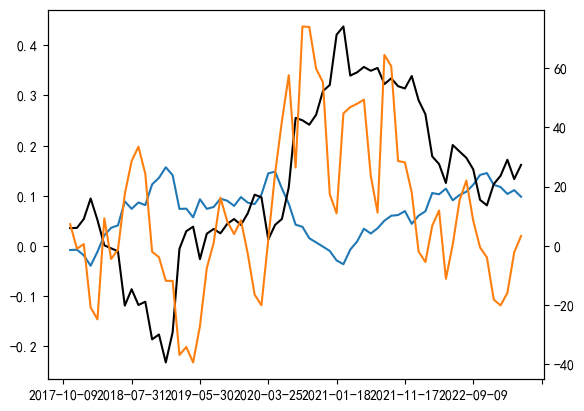

In [3210]:
(index_YSBgap).loc[(-IF['CS-test']).loc['2017-10-04':end_d].index,'300'].diff().rolling(20).mean()[::20].cumsum().plot()
(xy.Index_rets.loc['300','2017-10-04':end_d].rolling(20).sum()[::20].cumsum()/1).plot(color='black')

(-IF['CS-test']).loc['2017-10-04':end_d].rolling(20).mean()[::20].plot(secondary_y=True)

In [3274]:
(index_YSBgap1/10).loc[(-IF['CS-test']).loc['2017-01-04':end_d].index,300].index

DatetimeIndex(['2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09',
               '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
               '2017-01-16', '2017-01-17',
               ...
               '2023-04-07', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-17', '2023-04-18',
               '2023-04-19', '2023-04-20'],
              dtype='datetime64[ns]', length=1530, freq=None)

In [3273]:
(IF['CS-test']).loc['2017-01-04':end_d].rolling(20).mean().index

Index(['2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09', '2017-01-10',
       '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
       ...
       '2023-04-07', '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13',
       '2023-04-14', '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20'],
      dtype='object', length=1530)

In [3284]:
index_YSBgap1

50      300     500     1000
2008-01-04 -4.1556 -4.0627 -3.8576  0.0000
2008-01-07 -4.1490 -4.0576 -3.8619  0.0000
2008-01-08 -4.1589 -4.0659 -3.8543  0.0000
2008-01-09 -4.1597 -4.0683 -3.8700  0.0000
2008-01-10 -4.1645 -4.0745 -3.8776  0.0000
...            ...     ...     ...     ...
2023-08-29  0.2961 -0.3721 -0.7774 -1.1580
2023-08-30  0.3146 -0.3588 -0.7670 -1.1553
2023-08-31  0.3273 -0.3475 -0.7537 -1.1433
2023-09-01  0.2772 -0.3855 -0.7846 -1.1723
2023-09-04  0.1992 -0.4459 -0.8351 -1.2194

[3810 rows x 4 columns]

<Axes: >

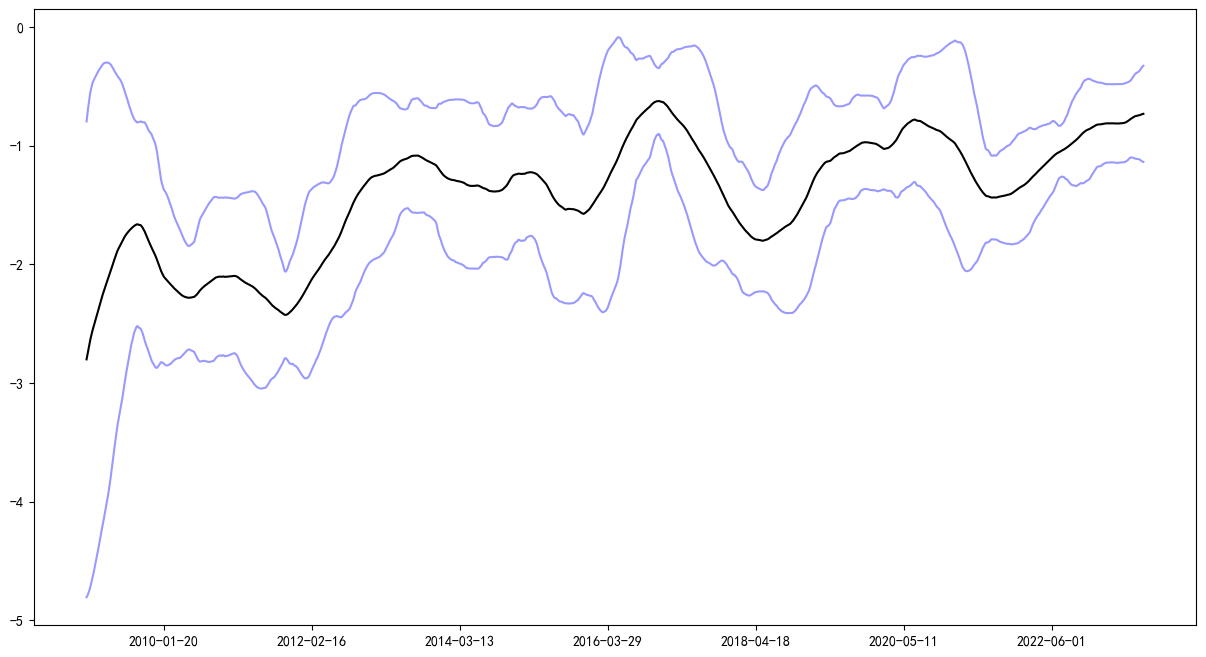

In [3471]:
index_YSBgap1.loc[:,300].rolling(240).mean().plot(color='black')
index_YSBgap1.loc[:,300].rolling(240).apply(lambda x: x.mean()+2*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8))
index_YSBgap1.loc[:,300].rolling(240).apply(lambda x: x.mean()-2*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8))


In [3357]:
index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':'2023-08-28'].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()+2*x.std())

2010-05-31         NaN
2010-06-01         NaN
2010-06-02         NaN
2010-06-03         NaN
2010-06-04         NaN
                ...   
2023-08-11   -0.375791
2023-08-14   -0.373657
2023-08-15   -0.370799
2023-08-16   -0.367909
2023-08-17   -0.365303
Name: 300, Length: 3211, dtype: float64

In [3359]:
index_YSBgap1

50      300     500     1000
2008-01-04 -4.1556 -4.0627 -3.8576  0.0000
2008-01-07 -4.1490 -4.0576 -3.8619  0.0000
2008-01-08 -4.1589 -4.0659 -3.8543  0.0000
2008-01-09 -4.1597 -4.0683 -3.8700  0.0000
2008-01-10 -4.1645 -4.0745 -3.8776  0.0000
...            ...     ...     ...     ...
2023-08-29  0.2961 -0.3721 -0.7774 -1.1580
2023-08-30  0.3146 -0.3588 -0.7670 -1.1553
2023-08-31  0.3273 -0.3475 -0.7537 -1.1433
2023-09-01  0.2772 -0.3855 -0.7846 -1.1723
2023-09-04  0.1992 -0.4459 -0.8351 -1.2194

[3810 rows x 4 columns]

<Axes: >

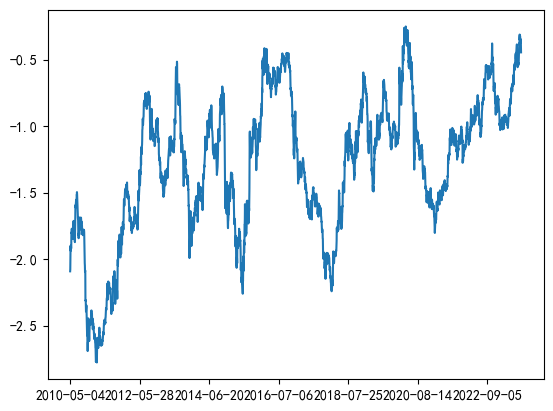

In [3369]:
index_YSBgap1.loc['2010-05-04':'2023-09-04',300].plot()

In [3395]:
(IF['CS-test']).loc['2010-05-04':'2023-08-04'].rolling(1).mean()

2010-05-04    193.551000
2010-05-05    162.006000
2010-05-06    223.144000
2010-05-07    197.011000
2010-05-10    168.767000
                 ...    
2023-07-31     97.653357
2023-08-01    114.282457
2023-08-02    142.388457
2023-08-03    107.299557
2023-08-04     91.704257
Name: CS-test, Length: 3222, dtype: float64

In [3489]:
SIGS = pd.concat([
    (IF['CS-test']).loc['2010-05-04':'2023-08-04'],
    (index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,300].rename('DB'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,300].rolling(240).apply(lambda x: x.mean()+2*x.std()).loc['2016-12-14':'2023-08-04'].rename('upline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,300].rolling(240).apply(lambda x: x.mean()-2*x.std()).loc['2016-12-14':'2023-08-04'].rename('downline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,300].rolling(240).apply(lambda x: x.mean()).loc['2016-12-14':'2023-08-04'].rename('midline')
],axis=1).shift().loc['2016-01-04':]

In [3493]:
IN300 = xy.IndexMin300jq.loc['2016-01-04 9:31':'2023-05-23 15:00','close'].copy()
FT300 = xy.Future_Min300jq.loc['2016-01-04 9:31':,'close'].copy()
IN300.index = IN300.index.map(lambda x: str(x)[:-2])

<Axes: >

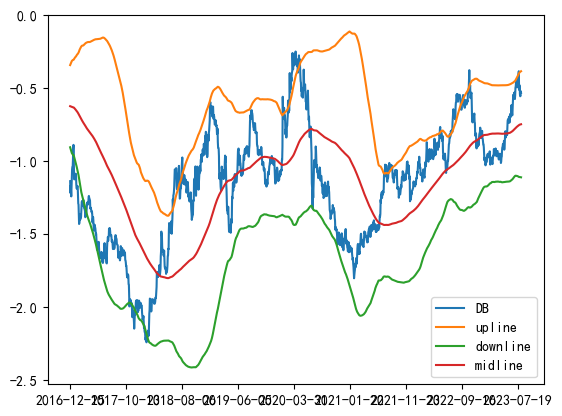

In [3502]:
SIGS.dropna().iloc[:,1:].plot()

In [3499]:
position = {}
pre_sig = np.nan

for d, row in SIGS.iterrows():
    if row['CS-test'] < 0:
        if row.DB <= row.downline:
            position[d] = -1
        # elif (row.DB > row.downline) & (row.DB < row.midline):
        #     position[d] = np.nan
        else:
            position[d] = np.nan
            
    if row['CS-test'] > 0:
        if row.DB >= row.upline:
            position[d] = np.nan
        # elif (row.DB < row.upline) & (row.DB > row.midline):
        #     position[d] = 1
        else:
            position[d] = np.nan
    # pre_sig = position[d]

<Axes: >

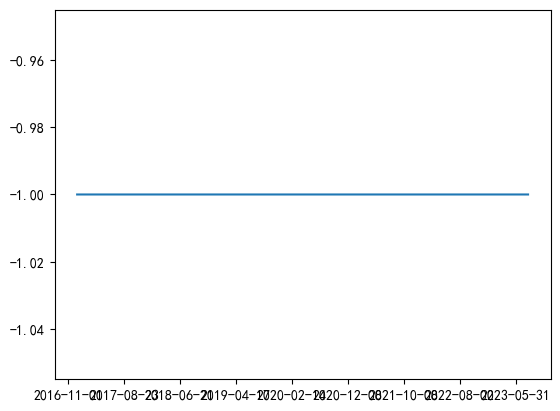

In [3500]:
pd.Series(position).ffill().plot()

<Axes: >

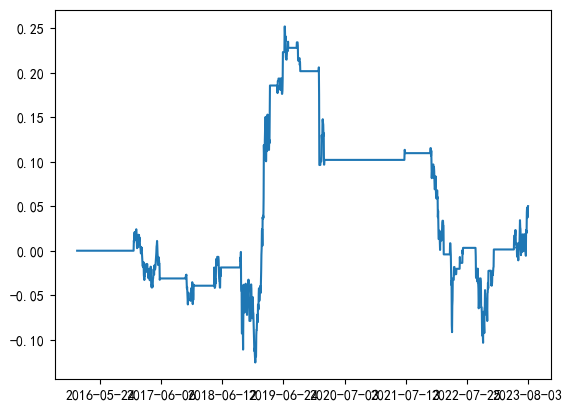

In [3497]:
(pd.Series(position).ffill() * xy.Index_rets.loc['300']).cumsum().plot()

In [3516]:
(index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2015-12-14':].index,300]

2015-12-14   -1.1162
2015-12-15   -1.0874
2015-12-16   -1.0717
2015-12-17   -1.0863
2015-12-18   -1.0450
               ...  
2023-08-11   -0.4791
2023-08-14   -0.4496
2023-08-15   -0.4069
2023-08-16   -0.3779
2023-08-17   -0.3860
Name: 300, Length: 1867, dtype: float64

<Axes: >

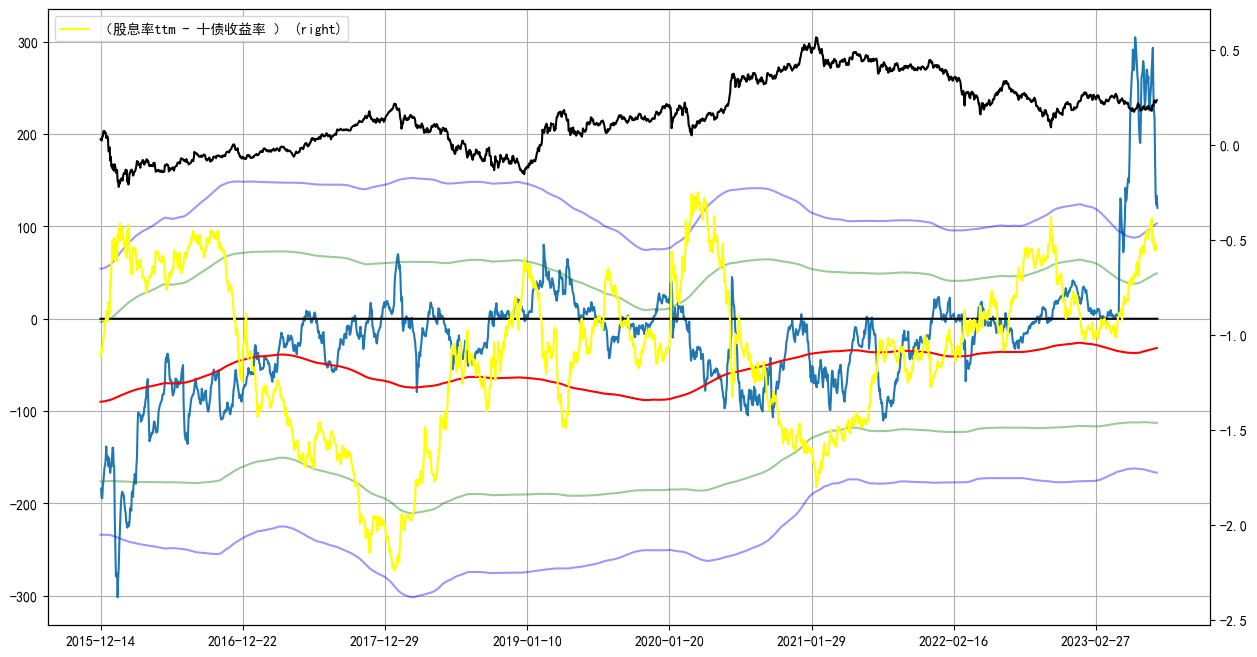

In [3514]:
(IF['CS-test']).loc['2015-12-14':'2023-08-04'].ewm(1).mean().shift().plot()
pd.Series(0,(-IF['CS-test']).loc['2015-12-14':'2023-08-04'].rolling(1).mean().index).plot(color='black',grid=True)
(xy.Index_rets.loc['300',index_YSBgap1.index & (IF['CS-test']).loc['2015-12-14':'2023-08-04'].index].cumsum()/1).plot(figsize=(15,8),color='black',grid=True,secondary_y=True)
# index_YSBgap1.loc[ index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.9)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
# index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.5)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
# index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.1)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()+2*x.std()).loc['2015-12-14':'2023-08-04'].plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()-2*x.std()).loc['2015-12-14':'2023-08-04'].plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()).loc['2015-12-14':'2023-08-04'].plot(color='red',alpha=1,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()+1.2*x.std()).loc['2015-12-14':'2023-08-04'].plot(color='green',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()-1.2*x.std()).loc['2015-12-14':'2023-08-04'].plot(color='green',alpha=0.4,figsize=(15,8),secondary_y=True)


# index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':end_d].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()+3*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
# index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':end_d].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()-3*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
(index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2015-12-14':'2023-08-04'].index,300].rename('（股息率ttm - 十债收益率 ）').plot(figsize=(15,8),color='yellow',secondary_y=True,legend='True')

In [ ]:
(-IF['CS-test']).loc['2017-10-04':end_d].rolling(20).mean()[::20]

<Axes: >

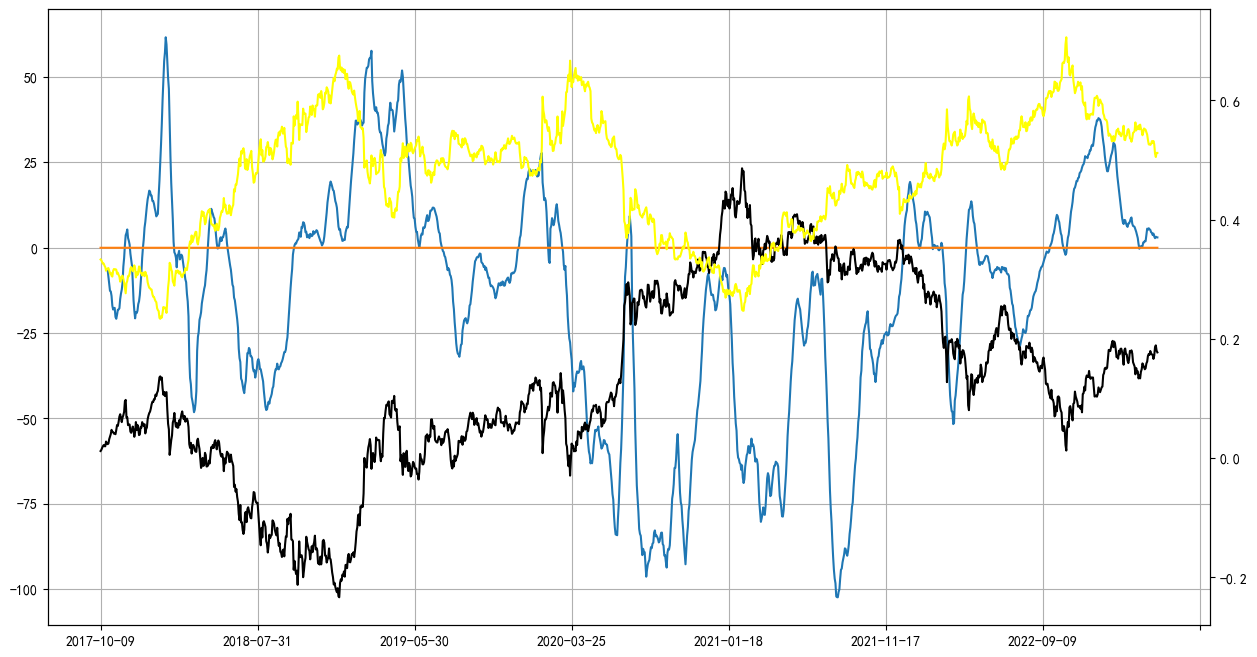

In [3226]:
(IF['CS-test']).loc['2017-10-04':end_d].rolling(10).mean().plot()
pd.Series(0,(-IF['CS-test']).loc['2017-10-04':end_d].rolling(10).mean().index).plot(grid=True)
(xy.Index_rets.loc['300',(-IF['CS-test']).loc['2017-10-04':end_d].rolling(10).mean().index].cumsum()/1).plot(figsize=(15,8),color='black',grid=True,secondary_y=True)
(index_YSBgap).loc[(-IF['CS-test']).loc['2017-10-04':end_d].index,'300'].plot(figsize=(15,8),color='yellow',secondary_y=True)

<Axes: >

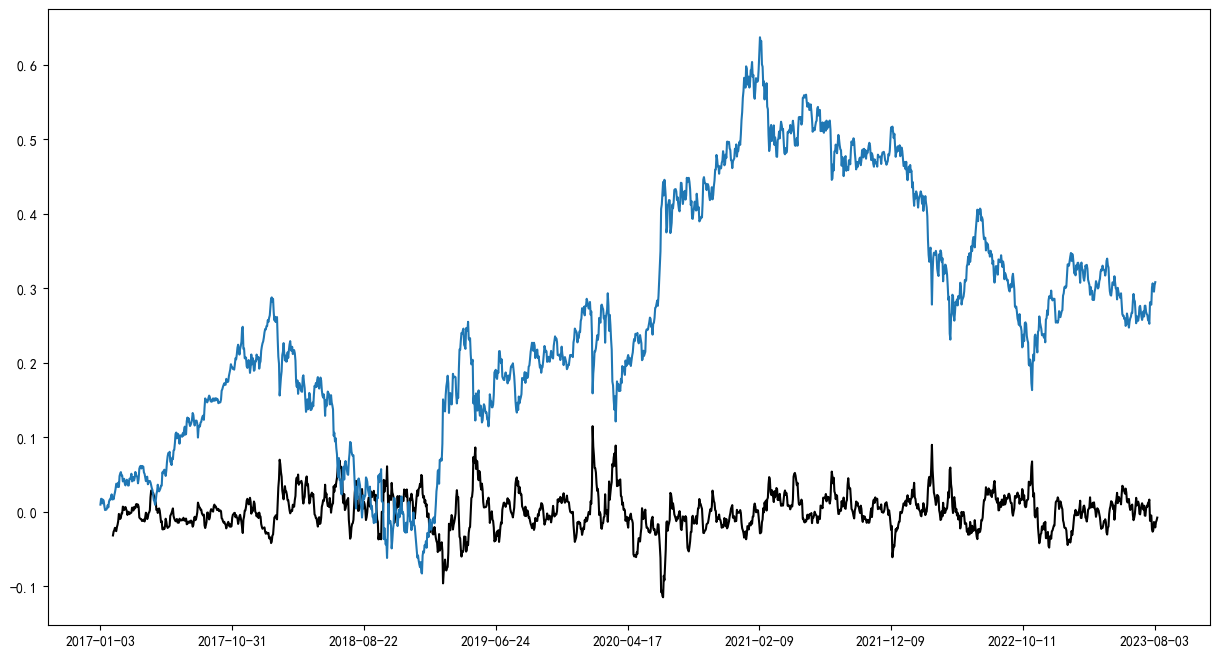

In [3126]:
((index_YSBgap/10)-(index_YSBgap/10).rolling(20).mean()).loc[:,'300'].plot(figsize=(15,8),color='black')
xy.Index_rets.loc['300',xy.Index_rets.columns & index_YSBgap.index].cumsum().plot()

In [3097]:
IF['CS-test'].dropna().rolling(2000,min_periods=1).apply(lambda x:x.mean()).dropna()

2010-04-19    0.000081
2010-04-20    0.000015
2010-04-21    0.000022
2010-04-22    0.000011
2010-04-23    0.000008
                ...   
2023-04-17    0.000096
2023-04-18    0.000095
2023-04-19    0.000095
2023-04-20    0.000095
2023-04-21    0.000096
Name: CS-test, Length: 3163, dtype: float64

In [3098]:
xy.Index_rets.loc['300',start_d:end_d].cumsum()

2016-01-04   -0.070206
2016-01-05   -0.067406
2016-01-06   -0.049863
2016-01-07   -0.119195
2016-01-08   -0.098803
                ...   
2023-04-14    0.227245
2023-04-17    0.241269
2023-04-18    0.244317
2023-04-19    0.235313
2023-04-20    0.232515
Name: 300, Length: 1775, dtype: float64

In [3099]:
IF['CS-test'].dropna().rolling(2000,min_periods=1).apply(lambda x:x.rank()[-1]/len(x))

2010-04-19    1.000000
2010-04-20    0.500000
2010-04-21    0.666667
2010-04-22    0.500000
2010-04-23    0.600000
                ...   
2023-04-17    0.054500
2023-04-18    0.080500
2023-04-19    0.071500
2023-04-20    0.909500
2023-04-21    0.972000
Name: CS-test, Length: 3163, dtype: float64

<Axes: >

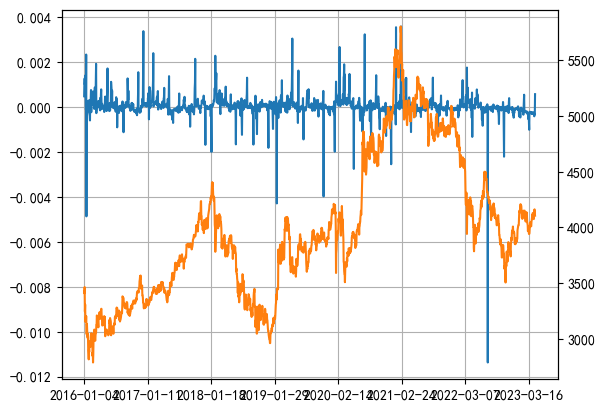

In [3100]:
IF['CS-test'].dropna().rolling(1).mean().loc[start_d:end_d].plot(grid=True)
IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].loc[start_d:end_d].plot(secondary_y=True)

In [3101]:
(IF['CS-test']**(1/1)).rolling(1).mean().loc[start_d:end_d].shift(1).corr(xy.Index_rets.loc['300',start_d:end_d])

-0.043939267875135204

In [3102]:
(IF['C1-C3']**(1/1)).rolling(1).mean().loc[start_d:end_d].shift(1).corr(xy.Index_rets.loc['300',start_d:end_d])

0.043293638575753586

In [3104]:
(IF['convex']**(1/2)).rolling(1).mean().loc[start_d:end_d].shift(1).corr(xy.Index_rets.loc['300',start_d:end_d])

0.049248599231936446

<Axes: >

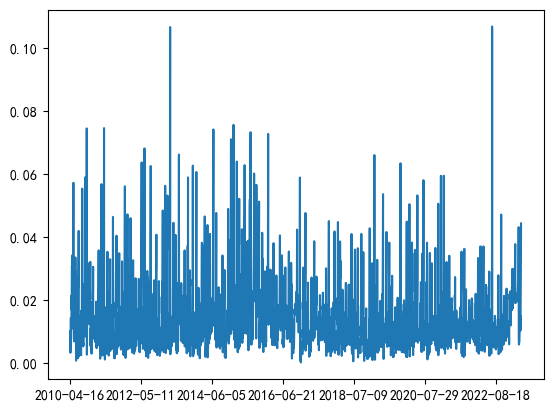

In [3105]:
(IF['convex']**(1/2)).plot()
# (IF['CS-test']**(1/2)).plot()

In [3106]:
shrd = (IF['convex']**(1/2)).median()

In [3107]:
(IF['convex']**(1/2)).loc[start_d:end_d].shift(1).describe()

count    1774.000000
mean        0.012341
std         0.008604
min         0.000045
25%         0.006912
50%         0.010267
75%         0.015206
max         0.106782
Name: convex, dtype: float64

<Axes: >

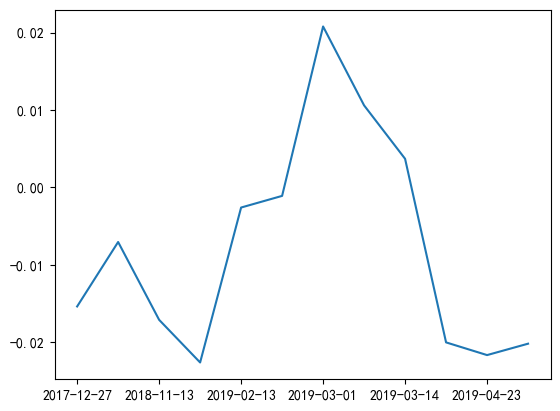

In [3058]:
((mix*2500 - (mix*2500).median()).map(lambda x: 1 if x>1 else (-1 if x<-1 else x)).dropna().shift() * xy.Index_rets.loc['300',start_d:end_d]).dropna().cumsum().plot()

In [3108]:
(IF['convex']**(1/2)).rolling(1).mean().loc[start_d:end_d].shift(1).corr(xy.Index_rets.loc['300',start_d:end_d])

0.049248599231936446

<Axes: >

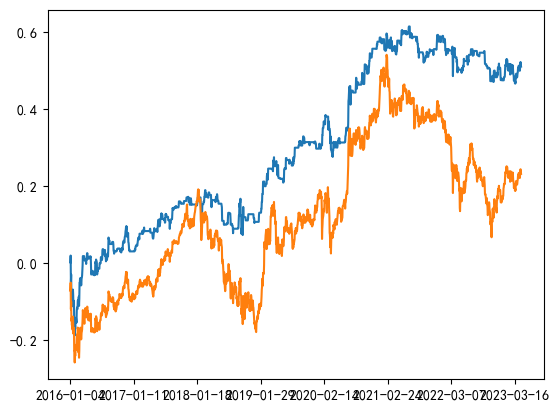

In [3109]:
long = pd.Series(((xy.Index_rets.loc['300',start_d:end_d][(IF['convex']**(1/2)).loc[start_d:end_d].shift(1)>shrd])))
pd.Series(long,index=xy.Index_rets.loc['300',start_d:end_d].index).cumsum().ffill().plot()
xy.Index_rets.loc['300',start_d:end_d].cumsum().plot()

In [3110]:
short = pd.Series(((xy.Index_rets.loc['300',start_d:end_d][(IF['convex']**(1/2)).loc[start_d:end_d].shift(1)<shrd])))
pd.Series(short,index=xy.Index_rets.loc['300',start_d:end_d].index).cumsum().ffill().plot()
xy.Index_rets.loc['300',start_d:end_d].cumsum().plot()

<Axes: >

<Axes: >

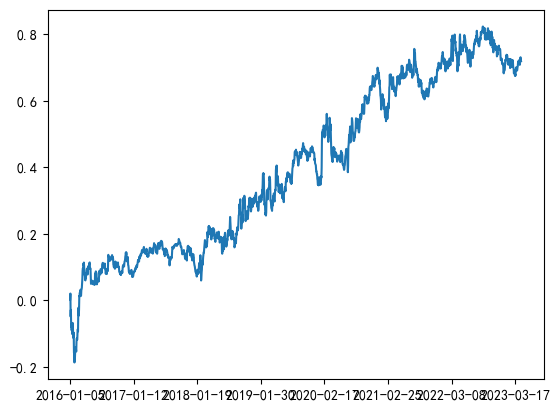

In [3111]:
pd.concat([long,-short]).sort_index().cumsum().plot()

In [2420]:
(mix-shrd).shift(1).describe()

count    1969.000000
mean        0.000190
std         0.000669
min        -0.000200
25%        -0.000098
50%         0.000010
75%         0.000210
max         0.009677
Name: convex, dtype: float64

In [2448]:
IF['CS-test'].rolling(1).mean().loc[start_d:end_d].shift(1).map(lambda x:1 if x > 0 else -1)

2017-01-04   -1
2017-01-05   -1
2017-01-06    1
2017-01-09    1
2017-01-10    1
             ..
2023-04-14   -1
2023-04-17   -1
2023-04-18   -1
2023-04-19   -1
2023-04-20   -1
Name: CS-test, Length: 1530, dtype: int64

<Axes: >

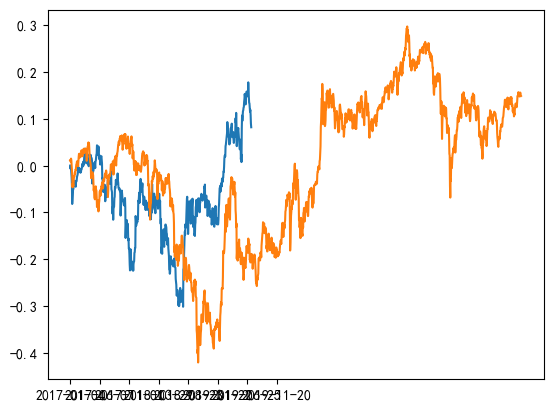

In [2577]:
(((mix-shrd).shift(1).map(lambda x: x if (x)<1 else 1 ).map(lambda x:x**(1/73) if x > 0 else -(-x)**(1/73)))  * xy.Index_rets.loc['1000',start_d:end_d]).dropna().cumsum().ffill().plot()
xy.Index_rets.loc['300',start_d:end_d].cumsum().plot()

In [2462]:
sig = IF['CS-test'].rolling(1).mean().loc[start_d:end_d].shift(1).map(lambda x:1 if x > 0 else -1)

<Axes: >

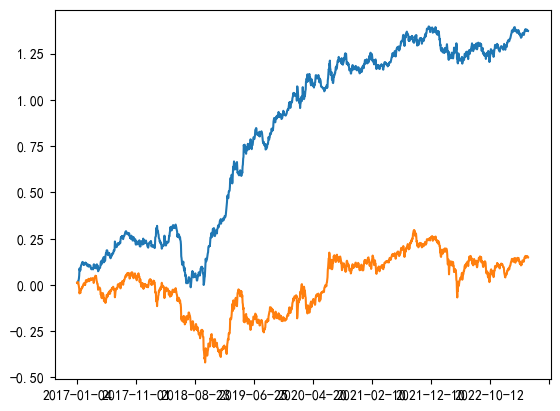

In [2463]:
(((mix-shrd).shift(1).map(lambda x: x if (x)<1 else 1 ).map(lambda x:x**(1/73) if x > 0 else (-x)**(1/73))) * (-sig) * xy.Index_rets.loc['1000',start_d:end_d]).dropna().cumsum().ffill().plot()
xy.Index_rets.loc['300',start_d:end_d].cumsum().plot()

In [1271]:
().rolling(1).mean().loc[start_d:end_d].shift(1).corr(xy.Index_rets.loc['300',start_d:end_d])

-0.03325236264531415

<Axes: >

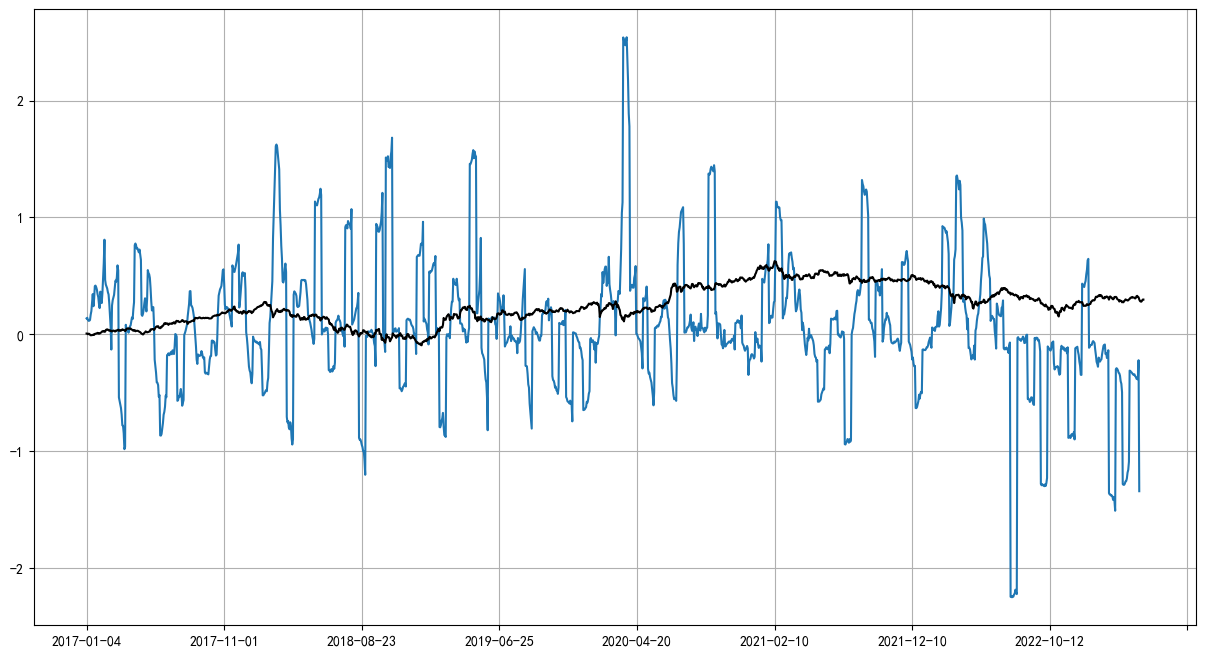

In [1230]:
# (IF['contago1'].abs()**(1/5)*np.sign(IF['contago1'])).rolling(20).mean().loc[start_d:end_d].plot()
IF['CS-test'].rolling(10).mean().loc[start_d:end_d].plot()
# (IF['convex']).rolling(20).mean().loc[start_d:end_d].plot(secondary_y=True)
(xy.Index_rets.loc['300',start_d:end_d].cumsum()/1).plot(figsize=(15,8),color='black',grid=True)

In [138]:
IF['C2-C1/C1'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')].rolling(1).mean() - IF['300'])/IF['300'].rolling(1).mean()
IF['C3-C1/C1'] = (IF[('IF00C3.CFE', 'IF下季连续', '收盘价')].rolling(1).mean() - IF['300'])/IF['300'].rolling(1).mean()
IF['C4-C1/C1'] = (IF[('IF00C4.CFE', 'IF隔季连续', '收盘价')].rolling(1).mean() - IF['300'])/IF['300'].rolling(1).mean()
# IF['C2-C1/C1'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')] - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')])/IF[('IF00C1.CFE', 'IF当月连续', '收盘价')]

IF['contago1'] = (1 + IF['C2-C1/C1'])   #* (1 + IF['C4-C1/C1'])
IF['contago2'] = (1 + IF['C3-C1/C1']/4)
IF['contago3'] = (1 + IF['C4-C1/C1']/7)


# IF['C2-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C3-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C4-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
(IF['contago1'].loc['2021-01-04':].rolling(10).mean()-1).plot(figsize=(15,8),color='red')
(IF['contago2'].loc['2021-01-04':].rolling(10).mean()-1).plot(figsize=(15,8),color='red',alpha=0.6)
(IF['contago3'].loc['2021-01-04':].rolling(10).mean()-1).plot(figsize=(15,8),color='red',alpha=0.2)

# (IF['C4-C1/C1'].loc['2015-05-04':].rolling(10).mean() - IF['C2-C1/C1'].loc['2015-05-04':].rolling(10).mean()).plot(figsize=(15,8),grid=True)
# (IF['C4-C1/C1'].loc['2015-05-04':].rolling(10).mean() - IF['C3-C1/C1'].loc['2015-05-04':].rolling(10).mean()).plot(figsize=(15,8),grid=True)

(index_YSBgap/100).loc['2021-01-04':,'300'].plot(figsize=(15,8),grid=True,color='yellow')
# plt.show()
xy.Index_rets.loc['300','2021-01-04':].cumsum().plot(figsize=(15,8),secondary_y=True,color='black')
# IF_hold.apply(lambda x:x/IF_hold.sum(axis=1)).loc['2015-05-04':,('IF00C4.CFE', 'IF隔季连续', '持仓量')].plot(figsize=(15,8),secondary_y=True)

<Axes: >

## 计算

In [33]:
index_YSBgap = pd.read_csv('E:\PyProject\Index_valuation\index_YSBgap.csv',index_col=0)

In [3281]:
index_YSBgap1 = pd.read_excel(r'E:\PyProject\Index_valuation\index_YSBgap1.xlsx',index_col=0)
index_YSBgap1.index = index_YSBgap1.index.map(lambda x:str(x)[:10]) 

<Axes: >

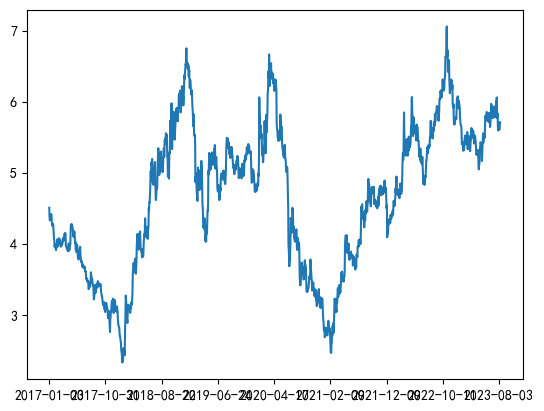

In [3253]:
index_YSBgap['300'].plot()